# Exercise Sheet 0: PySCF

- Excercise sheets will be published on Tuesday
- Assign yourselves to groups in the Übungsgruppensystem
- Please hand-in your solutions in groups of up to two people

In [1]:
# uncomment these commands if running in Google Colab
# !pip install pyscf kora py3Dmol rdkit

## Setup on local machine

1. If you are using windows, install the Windows Subsystem for Linux (WSL) by following the instructions on (https://learn.microsoft.com/en-us/windows/wsl/install)
2. Download `miniconda` from (https://docs.anaconda.com/free/miniconda/)
3. Create the environment with the following command:
    ```bash
    conda create -n gmlqc pyscf py3Dmol rdkit notebook -c conda-forge -c pyscf
    ```
4. Activate the environment:
	```bash
	conda activate gmlqc
	```
5. Start Jupyter notebook:
	```bash
	jupyter notebook
	```

In [2]:
import numpy as np
import pyscf
from pyscf import dft, scf
from matplotlib import pyplot as plt

## Define the molecule

In [3]:
# define the geometry of the molecule
water_str = "O -0.0087 0.3953 -0.0000; \
              H 0.7976 -0.1944 0.0000; \
              H -0.7888 -0.2009 -0.000000"  # in Angstrom

In [4]:
# create the molecule object in PySCF
water_mol = pyscf.M(atom=water_str)
water_mol.atom_charges()

array([8, 1, 1], dtype=int32)

In [5]:
water_mol.atom_coords()

array([[-0.01644062,  0.74700874,  0.        ],
       [ 1.50724556, -0.36736276,  0.        ],
       [-1.49061597, -0.37964598,  0.        ]])

## Run Koh-Sham DFT calculation

In [6]:
# run the restricted, closed-shell Kohn-Sham DFT calculation with default parameters
mf = dft.RKS(water_mol)
# set how verbose PySCF should log
mf.verbose = 3
mf.run()

converged SCF energy = -74.7372728379576


## Determine bond angle

In [7]:
coords = water_mol.atom_coords()
l1 = np.linalg.norm(coords[0] - coords[1])
l2 = np.linalg.norm(coords[0] - coords[2])
l = 0.5 * (l1 + l2)
print(f"bond length {l} bohr")

bond length 1.8715589196767817 bohr


In [8]:
angles = np.linspace(90, 110, 10)
energies = []

In [9]:
for angle in angles:
    x = l * np.cos(angle * np.pi / 180)
    y = l * np.sin(angle * np.pi / 180)
    print(f"{angle=}")
    
    mol_angle = pyscf.M(atom=f"O 0 0 0; H {l} 0 0; H {x} {y} 0", unit="bohr", basis="aug-cc-pVQZ")
    mf = dft.RKS(mol_angle)
    mf.run()
    energies.append(mf.e_tot)

angle=90.0
converged SCF energy = -75.9059342429441
angle=92.22222222222223
converged SCF energy = -75.9073677373065
angle=94.44444444444444
converged SCF energy = -75.90853493933
angle=96.66666666666667
converged SCF energy = -75.9094444114913
angle=98.88888888888889
converged SCF energy = -75.9101048007788
angle=101.11111111111111
converged SCF energy = -75.9105248249373
angle=103.33333333333333
converged SCF energy = -75.9107132051118
angle=105.55555555555556
converged SCF energy = -75.9106787098119
angle=107.77777777777777
converged SCF energy = -75.9104303188917
angle=110.0
converged SCF energy = -75.9099773788642


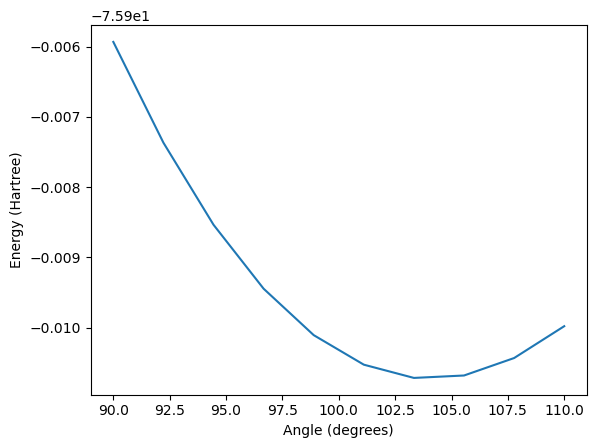

In [10]:
plt.plot(angles, energies)

plt.xlabel("Angle (degrees)")
plt.ylabel("Energy (Hartree)")
plt.show()

In [11]:
angles[np.argmin(energies)]

103.33333333333333

## MP2 and CISD calculations

In [12]:
# Hartree Fock
hf = scf.RHF(water_mol)
hf.run()

converged SCF energy = -74.9639141278499


In [13]:
# MP2 calculation
mp2 = hf.MP2()
mp2.run()

E(MP2) = -75.0019384892733  E_corr = -0.0380243614234017
E(SCS-MP2) = -75.0076576645136  E_corr = -0.0437435366636798


In [14]:
# CISD calculation
ci = hf.CISD()
ci.run()

E(RCISD) = -75.01660889619129  E_corr = -0.05269476834137694
